# Universidad de Buenos Aires
## Deep Learning - TP1

### _Alumno: Natanael Emir Ferrán_
### _Cohorte: 12_

### Ejercicio 1



Se quiere encontrar el máximo de la siguiente función:

$z = -(x - 2)^2 - (y - 3)^2 + 4$
<br>
<br>
1. Aplicar gradiente de forma analítica e igualar a zero para encontrar los valores de $x$ e $y$ donde $z$ tiene un máximo. Cuál es el valor del máximo?

2. Aplicar SGD para encontrar la ubicación del máximo de manera numérica (pueden utilizar pytorch). Comparar con el resultado obtenido en el punto 1

#### Solución

A fin de obtener los puntos críticos de la función $z$, obtenemos sus derivadas primeras y las igualamos a 0:

$$ \frac{dz}{dx} = -2(x-2) = 0 $$

$$ \frac{dz}{dy} = -2(x-3) = 0 $$

$$ x = 2 $$

$$ y = 3 $$

A raíz de estos resultados, observamos que contamos con un único punto crítico $(2,3)$.

A fin de conocer si se trata de un máximo, un mínimo o un punto de inflexión, armamos la [_matriz hessiana_](https://es.wikipedia.org/wiki/Matriz_hessiana) y analizamos sus autovalores. La misma se conforma de la siguiente manera:

$$ H(z) =
\begin{pmatrix}
\frac{d^{2}z}{dx^{2}} & \frac{d^{2}z}{dxdy} \\
\frac{d^{2}z}{dydx} & \frac{d^{2}z}{dy^{2}}
\end{pmatrix}
$$

Entonces calculamos:

$$ \frac{d^{2}z}{dx^{2}} = -2 $$

$$ \frac{d^{2}z}{dxdy} = 0 $$

$$\frac{d^{2}z}{dydx}=0$$

$$\frac{d^{2}z}{dy^{2}}=-2$$

Reemplazamos y obtenemos:

$$ H(z) =
\begin{pmatrix}
-2 & 0 \\
0 & -2
\end{pmatrix}
$$

Como los autovalores son ambos negativos, entonces concluímos que el punto crítico encontrado se trata de un máximo.

Finalmente, reemplazamos los valores de $x$ y $y$ en la función $z$ a fin de obtener el valor del máximo:

$$
z(x=2,y=3) = -(2-2)^{2}-(3-3)^{2}+4 = 4
$$

***


Seguidamente, utilizaremos `pytorch` para resolver el ejercicio con SGD:

In [194]:
# first we import libraries
import torch
from tqdm import tqdm

In [195]:
# defining function
def function(x, y):
    return -(x - 2)**2 - (y - 3)**2 + 4

# we initialize variables
x = torch.tensor([0.0], requires_grad=True)
y = torch.tensor([0.0], requires_grad=True)

# choosing HP
lr = 0.001
epochs = 5000

# starting loop
for epoch in tqdm(range(epochs)):

    # calculating output
    output = function(x, y)
    
    # getting gradients
    output.backward()
    
    # updating variables
    x.data = x.data + lr * x.grad.data
    y.data = y.data + lr * y.grad.data
    
    # restarting gradients
    x.grad.data.zero_()
    y.grad.data.zero_()

# print results
print("x:", x.item())
print("y:", y.item())
print("Max value obtained:", output.item())

 43%|████▎     | 2127/5000 [00:00<00:00, 7129.20it/s]

100%|██████████| 5000/5000 [00:00<00:00, 6674.29it/s]

x: 1.9999114274978638
y: 2.999856948852539
Max value obtained: 4.0


### Ejercicio 2


Descargar el dataset del siguiente link: https://drive.google.com/file/d/1eFWn7eDmSFUK1JuuBBykxkC9J0CGYDKe/view?usp=sharing.

El dataset contiene mediciones obtenidas al ensayar un sistema de posicionamiento. El sistema consiste en un dispositivo móvil del cual se desea conocer la posición y 13 "balizas" fijas (distribuidas en un salón) que emiten señales de radio.

Cada fila del dataset contiene una posición del dispositivo móvil y los niveles de señal recibida (de las señales emitidas por cada una de las 13 balizas fijas) en dicha posición.

![Salon](https://drive.google.com/uc?export=view&id=1z3uHEd3tS1kQpGXfhPYn2GFfA95v_ArW)


Algunas consideraciones:
- La imágen anterior es orientativa, no se encuentra a escala ni representa la verdadera posición de las balizas fijas.
- La posición en el salón se divide en una cuadrícula. La posición horizontal se codifica con una letra de la A a la Z y la posición vertical se codifica con valores de 01 a 20.
- El nivel de señal recibida se mide de 0 (máximo teórico) a -200 (mínimo teórico). NA significa que no se recibe señal de la baliza en dicha posición. A efectos prácticos no recibir señal (NA) es equivalente a recibir una señal con nivel -200.

**Consignas:**

1. Analizar el dataset y aplicar las transformaciones que considere necesarias para entrenar un modelo de red neuronal.

2. Entrenar un modelo de **Deep Learning** con múltiples capas lineales que prediga la posición del dispositivo móvil en el salón (vertical y horizontal) a partir de las mediciones de los niveles de las 13 balizas. Graficar la evolución de la función de pérdida y la evolución de la métrica [MAE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html) durante el entrenamiento.

3. Comprobar el funcionamiento del modelo realizando una predicción sobre una muestra aleatoria del dataset y comparar con la posición real.

Con la finalidad de ahorrar energía en el dispositivo móvil y simplificar el sistema, se quiere ensayar la posibilidad de predecir la posición solamente con la información del nivel de señal de las 2 balizas mas cercanas.

4. Aplicar las transformaciones necesarias sobre el dataset para obtener un nuevo dataset que contenga solamente la información de las 2 balizas con mayor nivel de señal (ver imágen adjunta). Si no se recibe señal de una 2da baliza, proponer un método para completar la información faltante.

![Dataset Punto 4](https://drive.google.com/uc?export=view&id=1kz1Y5m5rmbYPiuZIc4QHvnt4uFB2TwWu)


5. Entrenar un modelo de **Deep Learning** que prediga la posición del dispositivo móvil en el salón (vertical y horizontal) a partir del dataset del punto 4, incluyendo **una capa de embeddings** para ambos número (o IDs) de balizas.

6. Comparar los resultados obtenidos con los modelo de los puntos 2 y 5 y enunciar conclusiones.

#### Solución

In [196]:
# first we import essential libraries
import pandas as pd
import numpy as np
import torch
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [197]:
# reading data
url= 'https://raw.githubusercontent.com/nferran/tp_deep_learning/main/Positioning_data.csv'
df= pd.read_csv(url)
df.head()

,Pos,Baliza1,Baliza2,Baliza3,Baliza4,Baliza5,Baliza6,Baliza7,Baliza8,Baliza9,Baliza10,Baliza11,Baliza12,Baliza13
0,O02,NaN,NaN,NaN,NaN,NaN,-78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P01,NaN,NaN,NaN,NaN,NaN,-78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P01,NaN,NaN,NaN,NaN,NaN,-77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P01,NaN,NaN,NaN,NaN,NaN,-77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P01,NaN,NaN,NaN,NaN,NaN,-77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [198]:
# checking basic info
df.shape

(1420, 14)

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1420 entries, 0 to 1419
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pos       1420 non-null   object 
 1   Baliza1   25 non-null     float64
 2   Baliza2   497 non-null    float64
 3   Baliza3   280 non-null    float64
 4   Baliza4   402 non-null    float64
 5   Baliza5   247 non-null    float64
 6   Baliza6   287 non-null    float64
 7   Baliza7   50 non-null     float64
 8   Baliza8   91 non-null     float64
 9   Baliza9   31 non-null     float64
 10  Baliza10  29 non-null     float64
 11  Baliza11  25 non-null     float64
 12  Baliza12  35 non-null     float64
 13  Baliza13  44 non-null     float64
dtypes: float64(13), object(1)
memory usage: 155.4+ KB


In [200]:
# checking NaN existence
df.isna().sum(axis=0)

Pos            0
Baliza1     1395
Baliza2      923
Baliza3     1140
Baliza4     1018
Baliza5     1173
Baliza6     1133
Baliza7     1370
Baliza8     1329
Baliza9     1389
Baliza10    1391
Baliza11    1395
Baliza12    1385
Baliza13    1376
dtype: int64

In [201]:
# replacing NaN with -200 
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value= -200.0)
df_transformed= imp.fit_transform(df)
df_transformed= pd.DataFrame(data= df_transformed, columns= df.columns)

df_transformed.head()

,Pos,Baliza1,Baliza2,Baliza3,Baliza4,Baliza5,Baliza6,Baliza7,Baliza8,Baliza9,Baliza10,Baliza11,Baliza12,Baliza13
0,O02,-200.0,-200.0,-200.0,-200.0,-200.0,-78.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0
1,P01,-200.0,-200.0,-200.0,-200.0,-200.0,-78.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0
2,P01,-200.0,-200.0,-200.0,-200.0,-200.0,-77.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0
3,P01,-200.0,-200.0,-200.0,-200.0,-200.0,-77.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0
4,P01,-200.0,-200.0,-200.0,-200.0,-200.0,-77.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0


In [202]:
# re-checking NaN existence
df_transformed.isna().sum(axis=0)

Pos         0
Baliza1     0
Baliza2     0
Baliza3     0
Baliza4     0
Baliza5     0
Baliza6     0
Baliza7     0
Baliza8     0
Baliza9     0
Baliza10    0
Baliza11    0
Baliza12    0
Baliza13    0
dtype: int64

In [203]:
# checking data types
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1420 entries, 0 to 1419
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Pos       1420 non-null   object
 1   Baliza1   1420 non-null   object
 2   Baliza2   1420 non-null   object
 3   Baliza3   1420 non-null   object
 4   Baliza4   1420 non-null   object
 5   Baliza5   1420 non-null   object
 6   Baliza6   1420 non-null   object
 7   Baliza7   1420 non-null   object
 8   Baliza8   1420 non-null   object
 9   Baliza9   1420 non-null   object
 10  Baliza10  1420 non-null   object
 11  Baliza11  1420 non-null   object
 12  Baliza12  1420 non-null   object
 13  Baliza13  1420 non-null   object
dtypes: object(14)
memory usage: 155.4+ KB


In [204]:
# fixing wrong data types
df_transformed[['Baliza1', 'Baliza2', 'Baliza3', 'Baliza4', 'Baliza5', 'Baliza6','Baliza7', 'Baliza8', 'Baliza9', 'Baliza10', 'Baliza11', 'Baliza12','Baliza13']] = df_transformed[['Baliza1', 'Baliza2', 'Baliza3', 'Baliza4', 'Baliza5', 'Baliza6','Baliza7', 'Baliza8', 'Baliza9', 'Baliza10', 'Baliza11', 'Baliza12','Baliza13']].apply(pd.to_numeric)

In [205]:
# re-checking data types
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1420 entries, 0 to 1419
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pos       1420 non-null   object 
 1   Baliza1   1420 non-null   float64
 2   Baliza2   1420 non-null   float64
 3   Baliza3   1420 non-null   float64
 4   Baliza4   1420 non-null   float64
 5   Baliza5   1420 non-null   float64
 6   Baliza6   1420 non-null   float64
 7   Baliza7   1420 non-null   float64
 8   Baliza8   1420 non-null   float64
 9   Baliza9   1420 non-null   float64
 10  Baliza10  1420 non-null   float64
 11  Baliza11  1420 non-null   float64
 12  Baliza12  1420 non-null   float64
 13  Baliza13  1420 non-null   float64
dtypes: float64(13), object(1)
memory usage: 155.4+ KB


In [206]:
# working in target's format
# defining function to split each position in two axis, X and Y
def split_at(obj, index):
    return obj[:index], obj[index:]

# applying split
df_transformed['Pos']= df_transformed['Pos'].apply(lambda x: split_at(x, 1))

# creating two new columns
df_transformed[['PosX', 'PosY']] = df_transformed['Pos'].apply(lambda x: pd.Series(x))

# dropping old column
df_transformed= df_transformed.drop('Pos', axis= 1)

# fixing data type
df_transformed['PosY']= df_transformed['PosY'].apply(pd.to_numeric)

df_transformed.head()


,Baliza1,Baliza2,Baliza3,Baliza4,Baliza5,Baliza6,Baliza7,Baliza8,Baliza9,Baliza10,Baliza11,Baliza12,Baliza13,PosX,PosY
0,-200.0,-200.0,-200.0,-200.0,-200.0,-78.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,O,2
1,-200.0,-200.0,-200.0,-200.0,-200.0,-78.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,P,1
2,-200.0,-200.0,-200.0,-200.0,-200.0,-77.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,P,1
3,-200.0,-200.0,-200.0,-200.0,-200.0,-77.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,P,1
4,-200.0,-200.0,-200.0,-200.0,-200.0,-77.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,P,1


In [207]:
# working in PosX format
# defining function to transform letters to integers
def letter2number(l):
    number= ord(l) - ord('A') + 1
    return number

# applying transformation
df_transformed['PosX']= df_transformed['PosX'].apply(lambda x: letter2number(x))

# fixing data type
df_transformed['PosX']= df_transformed['PosX'].apply(pd.to_numeric)

df_transformed.head()

,Baliza1,Baliza2,Baliza3,Baliza4,Baliza5,Baliza6,Baliza7,Baliza8,Baliza9,Baliza10,Baliza11,Baliza12,Baliza13,PosX,PosY
0,-200.0,-200.0,-200.0,-200.0,-200.0,-78.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,15,2
1,-200.0,-200.0,-200.0,-200.0,-200.0,-78.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,16,1
2,-200.0,-200.0,-200.0,-200.0,-200.0,-77.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,16,1
3,-200.0,-200.0,-200.0,-200.0,-200.0,-77.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,16,1
4,-200.0,-200.0,-200.0,-200.0,-200.0,-77.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,16,1


In [208]:
# final check of data types
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1420 entries, 0 to 1419
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Baliza1   1420 non-null   float64
 1   Baliza2   1420 non-null   float64
 2   Baliza3   1420 non-null   float64
 3   Baliza4   1420 non-null   float64
 4   Baliza5   1420 non-null   float64
 5   Baliza6   1420 non-null   float64
 6   Baliza7   1420 non-null   float64
 7   Baliza8   1420 non-null   float64
 8   Baliza9   1420 non-null   float64
 9   Baliza10  1420 non-null   float64
 10  Baliza11  1420 non-null   float64
 11  Baliza12  1420 non-null   float64
 12  Baliza13  1420 non-null   float64
 13  PosX      1420 non-null   int64  
 14  PosY      1420 non-null   int64  
dtypes: float64(13), int64(2)
memory usage: 166.5 KB


In [209]:
# splitting data
from sklearn.model_selection import train_test_split

x= df_transformed.drop(['PosX','PosY'], axis= 1).values
y= df_transformed[['PosX','PosY']].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, stratify= y)

n_train= X_train.shape[0]
n_test= X_test.shape[0]

In [210]:
# creating dataset in order to work with pytorch
class MyDataset(Dataset):

  def __init__(self, x, y):
    self.x = x
    self.y = y

  def __len__(self):
    return self.x.shape[0]

  def __getitem__(self, idx):
    return self.x[idx], self.y[idx]

In [211]:
# creating train and test sets
train_ds= MyDataset(X_train, y_train)
test_ds= MyDataset(X_test, y_test)

In [212]:
# checking getitem correct functionality
train_ds[20]

(array([-200., -200., -200., -200., -200.,  -80., -200., -200., -200.,
        -200., -200., -200., -200.]),
 array([12,  2]))

In [213]:
test_ds[20]

(array([-200., -200.,  -75.,  -79., -200., -200., -200., -200., -200.,
        -200., -200., -200., -200.]),
 array([17,  4]))

In [214]:
# checking len correct functionality
len(train_ds)

994

In [215]:
len(test_ds)

426

In [216]:
# creating batches
train_dataloader = DataLoader(train_ds, batch_size = 64, shuffle= True)
test_dataloader = DataLoader(test_ds, batch_size= 64)

In [217]:
# creating NN class
class NNet(torch.nn.Module):

  def __init__(self):
    # defining NN architecture
    super().__init__()
    self.linear_1= torch.nn.Linear(in_features= 13, out_features= 20, bias= True)
    self.relu_1= torch.nn.ReLU()
    self.linear_2= torch.nn.Linear(in_features= 20, out_features= 15, bias= True)
    self.relu_2= torch.nn.ReLU()
    self.linear_3= torch.nn.Linear(in_features= 15, out_features= 2, bias= True)

  def forward(self, x):
    # defining forward propagation calculation
    x= self.linear_1(x)
    x= self.relu_1(x)
    x= self.linear_2(x)
    x= self.relu_2(x)
    x= self.linear_3(x)

    return x

In [218]:
# initializing and checking NN schema
nnet= NNet()
print(nnet)

NNet(
  (linear_1): Linear(in_features=13, out_features=20, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=20, out_features=15, bias=True)
  (relu_2): ReLU()
  (linear_3): Linear(in_features=15, out_features=2, bias=True)
)


In [219]:
# checking quantity of trainable parameters
print(sum(p.numel() for p in nnet.parameters()))

627


In [220]:
# choosing loss function and optimizer
loss_function= torch.nn.MSELoss()
optimizer= torch.optim.Adam(nnet.parameters(), lr= 0.01)

In [221]:
# using gpu if available
device= "cpu"
if torch.cuda.is_available():
  device= "cuda:0"

device

'cpu'

In [222]:
# mounting NN in device 
nnet= nnet.to(device)

In [223]:
# epochs quantity
epochs= 50

train_loss_by_epoch= []
test_loss_by_epoch= []
epoch_mae= []
test_epoch_mae= []

# Mini-Batch training
for epoch in range(epochs):
  
  ############################################
  ## Training
  ############################################
  nnet.train(True)

  epoch_loss= 0
  epoch_y_hat= []
  epoch_y= []
  
  for i,data in enumerate(train_dataloader):
    # getting data from training batches
    x_batch, y_batch= data
    # copying data to device
    x_batch= x_batch.to(device).float()
    y_batch= y_batch.to(device).float()

    #### forward propagation ####
    # restarting gradients
    optimizer.zero_grad()
    y_batch_hat= nnet(x_batch)
    
    # loss calculation
    loss= loss_function(y_batch_hat, y_batch)

    #### backpropagation ####
    loss.backward()

    # updating parameters
    optimizer.step()
    
    # saving predictions and true values to calculate metrics
    epoch_y += list(y_batch.detach().cpu().numpy())
    epoch_y_hat += list(y_batch_hat.detach().cpu().numpy())

    # saving batch-loss
    epoch_loss = epoch_loss + loss.item()

  # loss-mean
  epoch_loss = epoch_loss / n_train
  # saving epoch loss to graph
  train_loss_by_epoch.append(epoch_loss)
  # calculating epoch metrics
  mae= metrics.mean_absolute_error(epoch_y, epoch_y_hat)
  # saving mae in order to graph
  epoch_mae.append(mae)

  ############################################
  ## Testing
  ############################################
  # disabling gradient calculation
  nnet.train(False)

  test_epoch_loss = 0
  test_epoch_y_hat = []
  test_epoch_y = []

  for i,data in enumerate(test_dataloader):
    # getting data from testing batches
    x_batch, y_batch= data
    # copying data to device
    x_batch= x_batch.to(device).float()
    y_batch= y_batch.to(device).float()

    #### forward propagation ####
    y_batch_hat= nnet(x_batch)
    
    # loss calculation
    loss= loss_function(y_batch_hat, y_batch)

    # saving batch-loss
    test_epoch_loss = test_epoch_loss + loss.item()

    # saving predictions and true values to calculate metrics
    test_epoch_y += list(y_batch.detach().cpu().numpy())
    test_epoch_y_hat += list(y_batch_hat.detach().cpu().numpy())

  # loss-mean
  test_epoch_loss = test_epoch_loss / n_test
  # saving epoch loss to graph
  test_loss_by_epoch.append(test_epoch_loss)
  # calculating epoch metrics
  test_mae= metrics.mean_absolute_error(test_epoch_y, test_epoch_y_hat)
  test_epoch_mae.append(test_mae)

  ############################################
  ### printing results per epoch
  ############################################
  print(f"Epoch {epoch} | " \
        f"Train/Test loss: {epoch_loss:.3f} / {test_epoch_loss:.3f} | " \
        f"Train/Valid MAE: {mae:.3f} / {test_mae:.3f}")

Epoch 0 | Train/Test loss: 1.487 / 0.262 | Train/Valid MAE: 6.626 / 3.047
Epoch 1 | Train/Test loss: 0.264 / 0.214 | Train/Valid MAE: 3.020 / 2.750
Epoch 2 | Train/Test loss: 0.223 / 0.201 | Train/Valid MAE: 2.808 / 2.657
Epoch 3 | Train/Test loss: 0.203 / 0.177 | Train/Valid MAE: 2.641 / 2.412
Epoch 4 | Train/Test loss: 0.187 / 0.164 | Train/Valid MAE: 2.452 / 2.285
Epoch 5 | Train/Test loss: 0.172 / 0.155 | Train/Valid MAE: 2.335 / 2.161
Epoch 6 | Train/Test loss: 0.166 / 0.148 | Train/Valid MAE: 2.281 / 2.130
Epoch 7 | Train/Test loss: 0.156 / 0.144 | Train/Valid MAE: 2.213 / 2.093
Epoch 8 | Train/Test loss: 0.152 / 0.141 | Train/Valid MAE: 2.170 / 2.133
Epoch 9 | Train/Test loss: 0.144 / 0.136 | Train/Valid MAE: 2.097 / 2.142
Epoch 10 | Train/Test loss: 0.127 / 0.107 | Train/Valid MAE: 2.062 / 1.871
Epoch 11 | Train/Test loss: 0.098 / 0.132 | Train/Valid MAE: 1.837 / 2.221
Epoch 12 | Train/Test loss: 0.093 / 0.082 | Train/Valid MAE: 1.847 / 1.710
Epoch 13 | Train/Test loss: 0.077 /

Epoch 20 | Train/Test loss: 0.051 / 0.049 | Train/Valid MAE: 1.401 / 1.361
Epoch 21 | Train/Test loss: 0.053 / 0.052 | Train/Valid MAE: 1.450 / 1.392
Epoch 22 | Train/Test loss: 0.053 / 0.051 | Train/Valid MAE: 1.417 / 1.384
Epoch 23 | Train/Test loss: 0.051 / 0.052 | Train/Valid MAE: 1.403 / 1.385
Epoch 24 | Train/Test loss: 0.048 / 0.055 | Train/Valid MAE: 1.366 / 1.437
Epoch 25 | Train/Test loss: 0.051 / 0.065 | Train/Valid MAE: 1.382 / 1.552
Epoch 26 | Train/Test loss: 0.050 / 0.045 | Train/Valid MAE: 1.374 / 1.292
Epoch 27 | Train/Test loss: 0.051 / 0.047 | Train/Valid MAE: 1.417 / 1.318
Epoch 28 | Train/Test loss: 0.052 / 0.053 | Train/Valid MAE: 1.413 / 1.431
Epoch 29 | Train/Test loss: 0.050 / 0.045 | Train/Valid MAE: 1.383 / 1.299
Epoch 30 | Train/Test loss: 0.049 / 0.046 | Train/Valid MAE: 1.381 / 1.294
Epoch 31 | Train/Test loss: 0.046 / 0.047 | Train/Valid MAE: 1.314 / 1.337
Epoch 32 | Train/Test loss: 0.046 / 0.047 | Train/Valid MAE: 1.335 / 1.339
Epoch 33 | Train/Test los

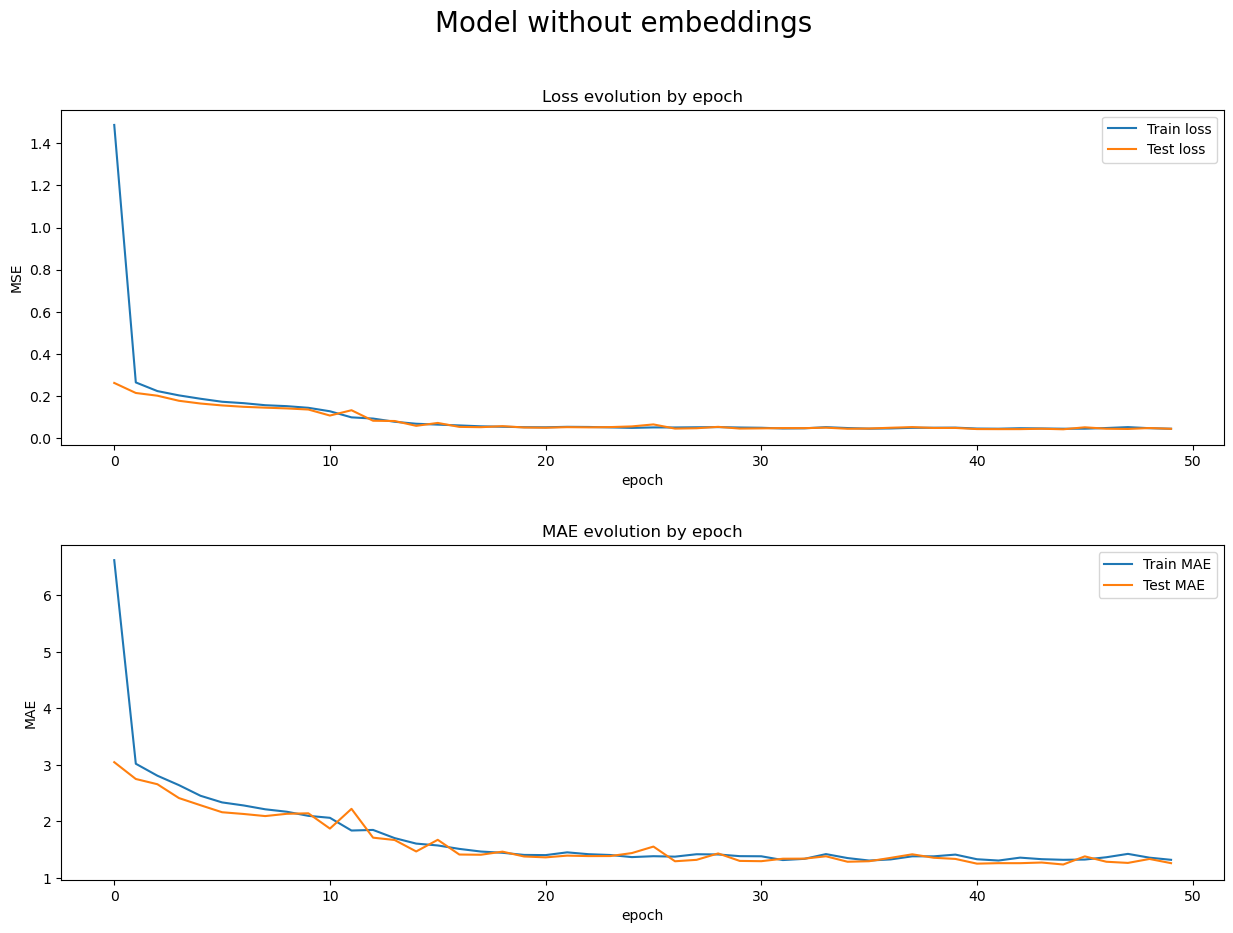

In [224]:
# graphing loss and MAE per epoch

fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(15,10), gridspec_kw= {'hspace': 0.3})
ax[0].plot(train_loss_by_epoch, label="Train loss")
ax[0].plot(test_loss_by_epoch, label="Test loss")
ax[0].legend()
ax[0].set_title("Loss evolution by epoch")
ax[0].set_xlabel("epoch")
ax[0].set_ylabel("MSE")

ax[1].plot(epoch_mae, label="Train MAE")
ax[1].plot(test_epoch_mae, label="Test MAE")
ax[1].legend()
ax[1].set_title("MAE evolution by epoch")
ax[1].set_xlabel("epoch")
ax[1].set_ylabel("MAE")

plt.suptitle('Model without embeddings', fontsize= 20)
plt.show()

In [225]:
# turning model into evaluation mode
nnet.eval()
# choosing example to predict 
to_predict= X_test[10]
# converting into torch tensor
to_predict= torch.tensor(to_predict, dtype=torch.float32)
# making prediction
with torch.no_grad():
    predicted_value= nnet(to_predict)

print("Prediction:", predicted_value.numpy(), '\nTrue value:', y_test[10])

Prediction: [11.025323  6.497029] 
True value: [12  6]


***

In [226]:
# creating a new dataset
df_transformed2= df_transformed.copy()
# creating an inputs dataset
df_inputs= df_transformed2.drop(['PosX','PosY'], axis= 1)
# getting name of the column with highest value
max_column_names= df_inputs.idxmax(axis=1)
# getting highest value
max_values = df_inputs.max(axis=1)
# adding columns to new dataset
df_transformed2['Baliza_maxima_señal'] = max_column_names
df_transformed2['Maxima_señal'] = max_values

df_transformed2.head(7)

,Baliza1,Baliza2,Baliza3,Baliza4,Baliza5,Baliza6,Baliza7,Baliza8,Baliza9,Baliza10,Baliza11,Baliza12,Baliza13,PosX,PosY,Baliza_maxima_señal,Maxima_señal
0,-200.0,-200.0,-200.0,-200.0,-200.0,-78.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,15,2,Baliza6,-78.0
1,-200.0,-200.0,-200.0,-200.0,-200.0,-78.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,16,1,Baliza6,-78.0
2,-200.0,-200.0,-200.0,-200.0,-200.0,-77.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,16,1,Baliza6,-77.0
3,-200.0,-200.0,-200.0,-200.0,-200.0,-77.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,16,1,Baliza6,-77.0
4,-200.0,-200.0,-200.0,-200.0,-200.0,-77.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,16,1,Baliza6,-77.0
5,-200.0,-200.0,-82.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,16,1,Baliza3,-82.0
6,-200.0,-200.0,-80.0,-200.0,-200.0,-77.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,16,1,Baliza6,-77.0


In [227]:
# getting column name of the second highest value
df_transformed2['Baliza_2da_maxima_señal'] = df_inputs.apply(lambda row: row.nlargest(2).idxmin(), axis=1)
# getting second highest value
df_transformed2['2da_maxima_señal'] = df_inputs.apply(lambda row: row.nlargest(2).min(), axis=1)

df_transformed2.head(7)

,Baliza1,Baliza2,Baliza3,Baliza4,Baliza5,Baliza6,Baliza7,Baliza8,Baliza9,Baliza10,Baliza11,Baliza12,Baliza13,PosX,PosY,Baliza_maxima_señal,Maxima_señal,Baliza_2da_maxima_señal,2da_maxima_señal
0,-200.0,-200.0,-200.0,-200.0,-200.0,-78.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,15,2,Baliza6,-78.0,Baliza1,-200.0
1,-200.0,-200.0,-200.0,-200.0,-200.0,-78.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,16,1,Baliza6,-78.0,Baliza1,-200.0
2,-200.0,-200.0,-200.0,-200.0,-200.0,-77.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,16,1,Baliza6,-77.0,Baliza1,-200.0
3,-200.0,-200.0,-200.0,-200.0,-200.0,-77.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,16,1,Baliza6,-77.0,Baliza1,-200.0
4,-200.0,-200.0,-200.0,-200.0,-200.0,-77.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,16,1,Baliza6,-77.0,Baliza1,-200.0
5,-200.0,-200.0,-82.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,16,1,Baliza3,-82.0,Baliza1,-200.0
6,-200.0,-200.0,-80.0,-200.0,-200.0,-77.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,16,1,Baliza6,-77.0,Baliza3,-80.0


In [228]:
# in case that there isn't a second highest value, then the column will be named with a custom label

# creating mask
mask = (df_transformed2['2da_maxima_señal'] == -200.0)

# assigning custom label
df_transformed2.loc[mask, 'Baliza_2da_maxima_señal'] = 'Ninguna'

df_transformed2.head(7)

,Baliza1,Baliza2,Baliza3,Baliza4,Baliza5,Baliza6,Baliza7,Baliza8,Baliza9,Baliza10,Baliza11,Baliza12,Baliza13,PosX,PosY,Baliza_maxima_señal,Maxima_señal,Baliza_2da_maxima_señal,2da_maxima_señal
0,-200.0,-200.0,-200.0,-200.0,-200.0,-78.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,15,2,Baliza6,-78.0,Ninguna,-200.0
1,-200.0,-200.0,-200.0,-200.0,-200.0,-78.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,16,1,Baliza6,-78.0,Ninguna,-200.0
2,-200.0,-200.0,-200.0,-200.0,-200.0,-77.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,16,1,Baliza6,-77.0,Ninguna,-200.0
3,-200.0,-200.0,-200.0,-200.0,-200.0,-77.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,16,1,Baliza6,-77.0,Ninguna,-200.0
4,-200.0,-200.0,-200.0,-200.0,-200.0,-77.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,16,1,Baliza6,-77.0,Ninguna,-200.0
5,-200.0,-200.0,-82.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,16,1,Baliza3,-82.0,Ninguna,-200.0
6,-200.0,-200.0,-80.0,-200.0,-200.0,-77.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,16,1,Baliza6,-77.0,Baliza3,-80.0


In [229]:
# final version of the new dataset
df_transformed2= df_transformed2.drop(df_inputs.columns, axis= 1)
df_transformed2.head(7)

,PosX,PosY,Baliza_maxima_señal,Maxima_señal,Baliza_2da_maxima_señal,2da_maxima_señal
0,15,2,Baliza6,-78.0,Ninguna,-200.0
1,16,1,Baliza6,-78.0,Ninguna,-200.0
2,16,1,Baliza6,-77.0,Ninguna,-200.0
3,16,1,Baliza6,-77.0,Ninguna,-200.0
4,16,1,Baliza6,-77.0,Ninguna,-200.0
5,16,1,Baliza3,-82.0,Ninguna,-200.0
6,16,1,Baliza6,-77.0,Baliza3,-80.0


In [250]:
# checking balance between classes
df_transformed2.Baliza_maxima_señal.value_counts()

Baliza2     374
Baliza4     348
Baliza3     171
Baliza6     168
Baliza5     148
Baliza8      45
Baliza13     37
Baliza7      28
Baliza9      28
Baliza11     21
Baliza12     21
Baliza10     19
Baliza1      12
Name: Baliza_maxima_señal, dtype: int64

In [249]:
df_transformed2.Baliza_2da_maxima_señal.value_counts()

Ninguna     908
Baliza3     111
Baliza2     109
Baliza6      79
Baliza5      77
Baliza4      46
Baliza8      27
Baliza7      19
Baliza12     14
Baliza1      10
Baliza10      8
Baliza11      6
Baliza13      3
Baliza9       3
Name: Baliza_2da_maxima_señal, dtype: int64

In [230]:
# splitting inputs and targets
balizas_1= df_transformed2['Baliza_maxima_señal']
balizas_2= df_transformed2['Baliza_2da_maxima_señal']
x= df_transformed2[['Maxima_señal','2da_maxima_señal']]
y= df_transformed2[['PosX','PosY']]

In [231]:
# converting into numpy arrays
x= x.to_numpy()
y= y.to_numpy()

In [232]:
# splitting data into train and test sets
idx= np.random.permutation(x.shape[0])
train_idx= idx[0:int(0.85*len(idx))]
test_idx= idx[int(0.85*len(idx)):]

train_x= x[train_idx]
train_y= y[train_idx]
test_x= x[test_idx]
test_y= y[test_idx]

n_train= train_x.shape[0]
n_test= test_x.shape[0]

In [233]:
# converting categorical inputs into indices
balizas_1_to_idx= {value:i for i,value in enumerate(balizas_1.unique())}
balizas_2_to_idx= {value:i for i,value in enumerate(balizas_2.unique())}

In [234]:
# converting indices into vectors
balizas_1_idx= np.array([balizas_1_to_idx[value] for value in balizas_1])
balizas_2_idx= np.array([balizas_2_to_idx[value] for value in balizas_2])

In [235]:
# splitting vectors into train and test sets
balizas_1_idx_train= balizas_1_idx[train_idx]
balizas_1_idx_test= balizas_1_idx[test_idx]

balizas_2_idx_train= balizas_2_idx[train_idx]
balizas_2_idx_test= balizas_2_idx[test_idx]

In [236]:
#
class MyDatasetWithEmbddings(Dataset):

  def __init__(self, x, balizas_1_idx, balizas_2_idx, y):
    self.x= x
    self.balizas_1_idx= balizas_1_idx
    self.balizas_2_idx= balizas_2_idx
    self.y= y

  def __len__(self):
    return self.x.shape[0]

  def __getitem__(self, idx):
    return self.x[idx], self.balizas_1_idx[idx], self.balizas_2_idx[idx], self.y[idx]

In [237]:
# 
train_ds_embeddings= MyDatasetWithEmbddings(train_x, balizas_1_idx_train, balizas_2_idx_train, train_y)
test_ds_embeddings= MyDatasetWithEmbddings(test_x, balizas_1_idx_test, balizas_2_idx_test, test_y)

In [238]:
# 
train_dataloader_emb= DataLoader(train_ds_embeddings, batch_size= 64, shuffle= True)
test_dataloader_emb= DataLoader(test_ds_embeddings, batch_size= 64)

In [239]:
# creating NN class
class NNetWithEmbeddings(torch.nn.Module):

  def __init__(self):
    super().__init__()
    self.embeddings1= torch.nn.Embedding(num_embeddings= 13, embedding_dim= 4)
    self.embeddings2= torch.nn.Embedding(num_embeddings= 14, embedding_dim= 4)
    self.linear_1= torch.nn.Linear(in_features= 2+4+4, out_features= 20, bias= True)
    self.relu_1= torch.nn.ReLU()
    self.linear_2= torch.nn.Linear(in_features= 20, out_features= 15, bias= True)
    self.relu_2= torch.nn.ReLU()
    self.linear_3= torch.nn.Linear(in_features= 15, out_features= 2, bias= True)

  def forward(self, x, balizas_1_idx, balizas_2_idx):
    embeddings_outputs_1= self.embeddings1(balizas_1_idx)
    embeddings_outputs_2= self.embeddings2(balizas_2_idx)
    x = torch.cat([x, embeddings_outputs_1, embeddings_outputs_2], dim=1)
    x = self.linear_1(x)
    x = self.relu_1(x)
    x = self.linear_2(x)
    x = self.relu_2(x)
    x = self.linear_3(x)
    return x

In [240]:
# initializing and checking NN schema 
nnnetWithEmbeddings= NNetWithEmbeddings()
print(nnnetWithEmbeddings)

NNetWithEmbeddings(
  (embeddings1): Embedding(13, 4)
  (embeddings2): Embedding(14, 4)
  (linear_1): Linear(in_features=10, out_features=20, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=20, out_features=15, bias=True)
  (relu_2): ReLU()
  (linear_3): Linear(in_features=15, out_features=2, bias=True)
)


In [241]:
# mounting NN on device
nnnetWithEmbeddings= nnnetWithEmbeddings.to(device)

In [242]:
# choosing loss function and optimizer
loss_function= torch.nn.MSELoss()
optimizer= torch.optim.Adam(nnnetWithEmbeddings.parameters(), lr= 0.01)

In [243]:
# epochs quantity
epochs= 50

train_loss_by_epoch= []
test_loss_by_epoch= []
epoch_mae= []
test_epoch_mae= []

# Mini-Batch training
for epoch in range(epochs):
  
  ############################################
  ## Training
  ############################################
  
  nnnetWithEmbeddings.train(True)

  epoch_loss= 0
  epoch_y_hat= []
  epoch_y= []
  
  for i,data in enumerate(train_dataloader_emb):
    # getting data from training batches
    x_batch, embed_batch_1, embed_batch_2 , y_batch= data
    # copying data to device
    x_batch= x_batch.to(device).float()
    embed_batch_1= embed_batch_1.to(device).int()
    embed_batch_2= embed_batch_2.to(device).int()
    y_batch= y_batch.to(device).float()

    #### forward propagation ####
    # restarting gradients
    optimizer.zero_grad()
    y_batch_hat= nnnetWithEmbeddings(x_batch, embed_batch_1, embed_batch_2)
    
    # loss calculation
    loss= loss_function(y_batch_hat, y_batch)

    #### backpropagation ####
    loss.backward()

    # updating parameters
    optimizer.step()
    
    # saving predictions and true values to calculate metrics
    epoch_y += list(y_batch.detach().cpu().numpy())
    epoch_y_hat += list(y_batch_hat.detach().cpu().numpy())

    # saving batch-loss
    epoch_loss = epoch_loss + loss.item()

  # loss-mean
  epoch_loss = epoch_loss / n_train
  # saving epoch loss to graph
  train_loss_by_epoch.append(epoch_loss)
  # calculating epoch metrics
  mae= metrics.mean_absolute_error(epoch_y, epoch_y_hat)
  # saving mae to graph
  epoch_mae.append(mae)

  ############################################
  ## Testing
  ############################################
  # disabling gradient calculation
  nnet.train(False)

  test_epoch_loss = 0
  test_epoch_y_hat = []
  test_epoch_y = []

  for i,data in enumerate(test_dataloader_emb):
    # getting data from testing batches
    x_batch, embed_batch_1, embed_batch_2, y_batch= data
    # copying data to device
    x_batch= x_batch.to(device).float()
    embed_batch_1= embed_batch_1.to(device).int()
    embed_batch_2= embed_batch_2.to(device).int()
    y_batch= y_batch.to(device).float()

    #### forward propagation ####
    y_batch_hat= nnnetWithEmbeddings(x_batch, embed_batch_1, embed_batch_2)
    
    # loss calculation
    loss= loss_function(y_batch_hat, y_batch)

    # saving batch-loss
    test_epoch_loss = test_epoch_loss + loss.item()

    # saving predictions and true values to calculate metrics
    test_epoch_y += list(y_batch.detach().cpu().numpy())
    test_epoch_y_hat += list(y_batch_hat.detach().cpu().numpy())

  # loss-mean
  test_epoch_loss = test_epoch_loss / n_test
  # saving epoch loss to graph
  test_loss_by_epoch.append(test_epoch_loss)
  # calculating epoch metrics
  test_mae= metrics.mean_absolute_error(test_epoch_y, test_epoch_y_hat)
  test_epoch_mae.append(test_mae)

  ############################################
  ### printing results per epoch
  ############################################
  print(f"Epoch {epoch} | " \
        f"Train/Test loss: {epoch_loss:.3f} / {test_epoch_loss:.3f} | " \
        f"Train/Valid MAE: {mae:.3f} / {test_mae:.3f}")

Epoch 0 | Train/Test loss: 0.674 / 0.315 | Train/Valid MAE: 5.191 / 3.138
Epoch 1 | Train/Test loss: 0.263 / 0.270 | Train/Valid MAE: 3.161 / 3.025
Epoch 2 | Train/Test loss: 0.237 / 0.267 | Train/Valid MAE: 2.968 / 2.761
Epoch 3 | Train/Test loss: 0.212 / 0.218 | Train/Valid MAE: 2.803 / 2.561
Epoch 4 | Train/Test loss: 0.175 / 0.189 | Train/Valid MAE: 2.476 / 2.173
Epoch 5 | Train/Test loss: 0.153 / 0.176 | Train/Valid MAE: 2.218 / 2.161
Epoch 6 | Train/Test loss: 0.142 / 0.158 | Train/Valid MAE: 2.137 / 2.022
Epoch 7 | Train/Test loss: 0.131 / 0.145 | Train/Valid MAE: 2.054 / 1.997
Epoch 8 | Train/Test loss: 0.121 / 0.126 | Train/Valid MAE: 1.951 / 1.794
Epoch 9 | Train/Test loss: 0.100 / 0.112 | Train/Valid MAE: 1.831 / 1.642
Epoch 10 | Train/Test loss: 0.077 / 0.089 | Train/Valid MAE: 1.602 / 1.511


Epoch 11 | Train/Test loss: 0.062 / 0.058 | Train/Valid MAE: 1.508 / 1.410
Epoch 12 | Train/Test loss: 0.050 / 0.055 | Train/Valid MAE: 1.430 / 1.375
Epoch 13 | Train/Test loss: 0.046 / 0.046 | Train/Valid MAE: 1.372 / 1.277
Epoch 14 | Train/Test loss: 0.044 / 0.044 | Train/Valid MAE: 1.329 / 1.255
Epoch 15 | Train/Test loss: 0.043 / 0.043 | Train/Valid MAE: 1.333 / 1.261
Epoch 16 | Train/Test loss: 0.041 / 0.043 | Train/Valid MAE: 1.301 / 1.211
Epoch 17 | Train/Test loss: 0.041 / 0.039 | Train/Valid MAE: 1.295 / 1.191
Epoch 18 | Train/Test loss: 0.041 / 0.053 | Train/Valid MAE: 1.288 / 1.387
Epoch 19 | Train/Test loss: 0.040 / 0.040 | Train/Valid MAE: 1.263 / 1.196
Epoch 20 | Train/Test loss: 0.038 / 0.038 | Train/Valid MAE: 1.234 / 1.150
Epoch 21 | Train/Test loss: 0.038 / 0.042 | Train/Valid MAE: 1.222 / 1.218
Epoch 22 | Train/Test loss: 0.040 / 0.048 | Train/Valid MAE: 1.266 / 1.316
Epoch 23 | Train/Test loss: 0.039 / 0.040 | Train/Valid MAE: 1.239 / 1.194
Epoch 24 | Train/Test los

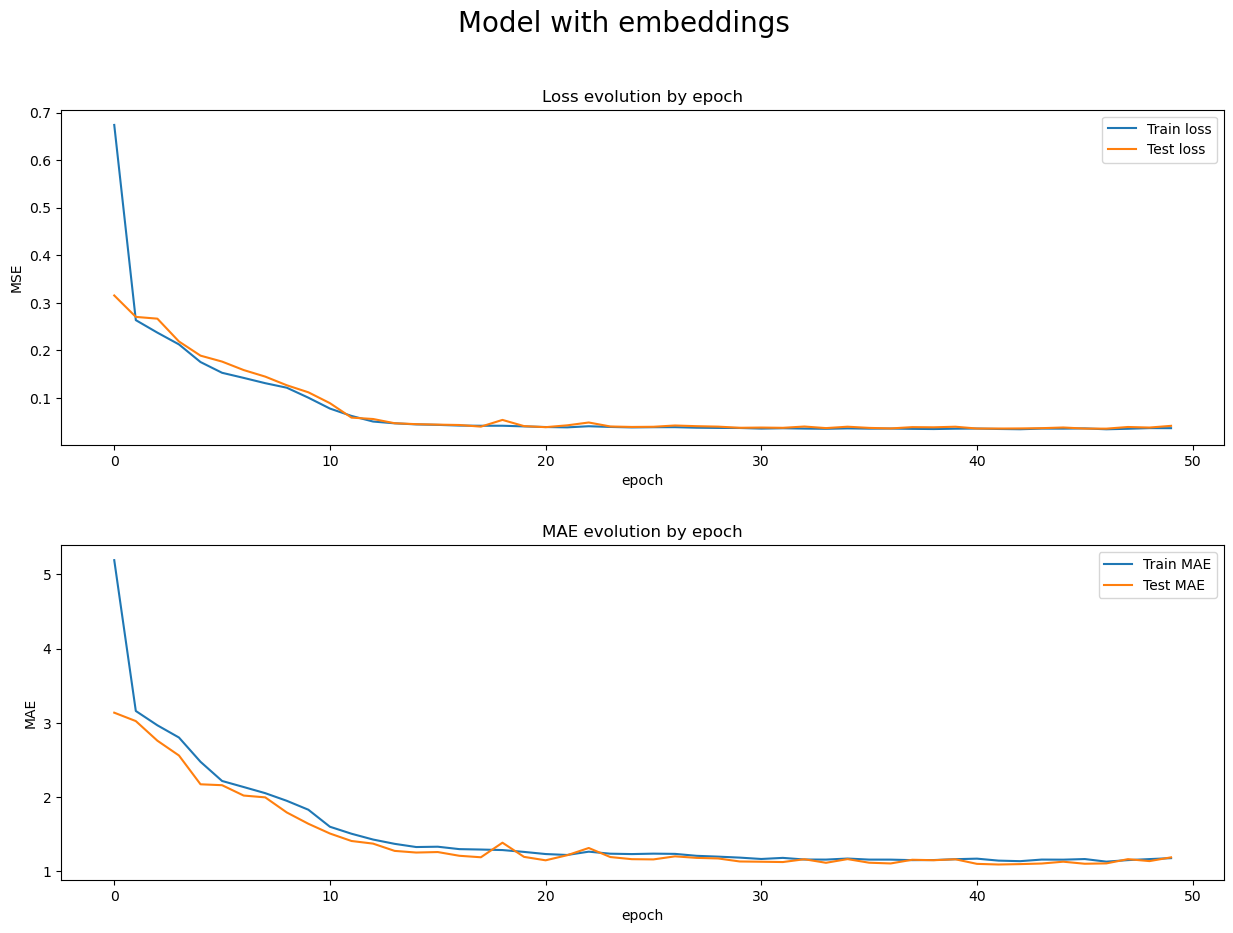

In [244]:
# graphing loss and MAE per epoch

fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(15,10), gridspec_kw= {'hspace': 0.3})
ax[0].plot(train_loss_by_epoch, label="Train loss")
ax[0].plot(test_loss_by_epoch, label="Test loss")
ax[0].legend()
ax[0].set_title("Loss evolution by epoch")
ax[0].set_xlabel("epoch")
ax[0].set_ylabel("MSE")

ax[1].plot(epoch_mae, label="Train MAE")
ax[1].plot(test_epoch_mae, label="Test MAE")
ax[1].legend()
ax[1].set_title("MAE evolution by epoch")
ax[1].set_xlabel("epoch")
ax[1].set_ylabel("MAE")

plt.suptitle('Model with embeddings', fontsize= 20)
plt.show()

##### Conclusiones

Luego de probar diversas estructuras, se ha optado por aquella que presenta un _mejor equilibrio entre performance y simplicidad._

Podría decirse que **ambos modelos presentan buenas métricas**. 

Al comparar el desempeño de ambos, luego de numerosas corridas, **no llegan a observarse grandes diferencias**. Tal vez el modelo con embeddings podría considerarse más estable o consistente en sus resultados.

Es posible que hicieran falta **mayor cantidad de ejemplos de cada baliza, y un mejor balance entre las clases**, a fin de obtener embeddings mejor entrenados y que esto impacte en la performance general.
